<a href="https://colab.research.google.com/github/maxotuteye/MLandAI/blob/main/whatsapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install profanity_check emoji

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm_notebook
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from profanity_check import predict, predict_prob
import warnings
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from textblob import TextBlob
import emoji
import itertools 
import matplotlib.style as style
from google.colab import files

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imp

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def valid_user(str):
  if len(str.split(' ')) < 5 and not 'left' in str and not 'added' in str and not 'removed' in str:
    return True
  elif '+91' in str and len(str.split(' ')) <= 3:
    return True
  return False

In [ ]:
def vali_date(text):
    try:
        datetime.datetime.strptime(text, '%m/%d/%y')
        return True
    except Exception as e:
      return False

In [ ]:
lines = []
with open('/content/drive/MyDrive/WhatsApp Chat with DSU Gaming.txt') as f:
  for line in f:
    if vali_date(line.split(',')[0]):
      lines.append(line.strip('\n'))
    else:
      lines[len(lines) - 1] += ' ' + line.strip('\n')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datetimes, names, msgs = ([] for i in range(3))


In [ ]:
for line in tqdm_notebook(lines, total = len(lines), unit = 'line'):
    datetimes.append(datetime.datetime.strptime(line.split('-')[0], '%m/%d/%y, %H:%M '))
    names.append(line.split('-')[1].split(':')[0].strip())
    msgs.append(''.join(line.split('-')[1].split(':')[1:]))

In [ ]:
# for i in range(len(names)):
#   name = names[i]
#   if "+1" in name:
#     if "284" in name:
#       name = "+1 470 284 5516"
#       names[i] = name
#     elif "602" in name:
#       name = "+1 615 602 8506"
#       names[i] = names
#     elif "810" in name:    
#       name = "+1 615 810 2627"
#       names[i] = name

In [ ]:
df = pd.DataFrame()
df['datetime'] = datetimes
df['name'] = names
df['msg'] = msgsdatetimes, names, msgs = ([] for i in range(3))
for line in tqdm_notebook(lines, total = len(lines), unit = 'line'):
    datetimes.append(datetime.datetime.strptime(line.split('-')[0], '%m/%d/%y, %H:%M '))
    names.append(line.split('-')[1].split(':')[0].strip())
    msgs.append(''.join(line.split('-')[1].split(':')[1:]))

In [ ]:
def valid_user(str):
  if len(str.split(' ')) < 5 and not 'left' in str and not 'added' in str and not 'removed' in str and not 'admin' in str:
    return True
  elif '+91' in str and len(str.split(' ')) <= 3:
    return True
  return False

In [ ]:
df = df[df['name'].apply(valid_user)]
df.loc[(df.name == '<redacted>'), 'name'] = 'MM' 
df.loc[(df.name == '<redacted>'), 'name'] = 'MM' 
df.loc[(df.name == '<redacted>'), 'name'] = 'SD' 
df.loc[(df.name == '<redacted>'), 'name'] = 'BA'
df.loc[(df.name == '<redacted>'), 'name'] = 'RF'
df.loc[(df.name == '<redacted>'), 'name'] = 'SJ'
df.loc[(df.name == '<redacted>'), 'name'] = 'GJ'
df.loc[(df.name == '<redacted>'), 'name'] = 'BD'
df.loc[(df.name == '<redacted>'), 'name'] = 'SM'
df = df[df['name'] != '<redacted>']
df['name'].unique()

array(['SilentGhost+', '+233 55 521 4548', '+233 24 196 4653',
       '+233 54 395 5735', '+233 27 679 6992', '+233 50 498 5975',
       '+233 20 302 4948', '+233 55 728 4617', '+233 55 507 5023',
       '+233 57 351 8383', '+233 26 421 6357', '+233 20 915 2812',
       '+233 54 851 0518', '+1 (615) 602', '+1 (470) 284',
       '+233 26 381 9011', '+233 54 621 7039', '+233 55 564 1594',
       '+233 24 936 6341', '+233 54 334 4904', '+44 7756 390937', 'Pyro',
       '+233 20 052 6969', '+233 24 829 1780', '+233 20 523 4042',
       '+233 54 345 0089', '+233 55 314 0472', '+233 26 911 3065',
       '+233 20 203 7373', '+233 55 630 9247', '+233 24 120 5516',
       'PopeOfDeath+', '+233 54 500 7952', '+233 50 114 8627',
       '+233 24 422 0425', '+233 57 615 9749', '+233 20 298 9873',
       '+44 7378 552558', '+233 24 128 8942', 'Steven AR',
       '+233 26 740 7269', '+233 50 008 7937', '+1 (615) 810',
       '+44 7411 440030', '+233 20 152 2502', '+233 55 459 7481',
       '+233 20 8

In [ ]:
df['date'] = df['datetime'].apply(lambda x: x.date())
df['day_sent'] = df['datetime'].dt.strftime('%a')
df['month_sent'] = df['datetime'].dt.strftime('%b')
df['year_sent'] = df['datetime'].dt.year
df['count'] = 1 # To groupby days and have a count of how many messages were sent per day
df = df[~df['msg'].apply(lambda x: True if '\xa0' in x else False)] # To remove characters with '\xa0'
print(df.shape)

(31276, 8)


In [ ]:
lines = []
with open('/content/drive/MyDrive/WhatsApp Chat with DSU Gaming.txt') as f:
  for line in f:
    if vali_date(line.split(',')[0]):
      lines.append(line.strip('\n'))
    else:
      lines[len(lines) - 1] += ' ' + line.strip('\n')

In [ ]:
datetimes, names, msgs = ([] for i in range(3))
for line in tqdm_notebook(lines, total = len(lines), unit = 'line'):
    datetimes.append(datetime.datetime.strptime(line.split('-')[0], '%m/%d/%y, %H:%M '))
    names.append(line.split('-')[1].split(':')[0].strip())
    msgs.append(''.join(line.split('-')[1].split(':')[1:]))

In [ ]:
df2 = pd.DataFrame()
df2['datetime'] = datetimes
df2['name'] = names
df2['msg'] = msgs

In [ ]:
df2 = df2[df2['name'].apply(valid_user)]
df2.loc[(df2.name == '<redacted>'), 'name'] = 'MM' 
df2.loc[(df2.name == '<redacted>'), 'name'] = 'SD' 
df2.loc[(df2.name == '<redacted>'), 'name'] = 'BA'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'RF'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'SJ'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'GJ'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'BD'
df2.loc[(df2.name == '<redacted>'), 'name'] = 'SM'
df2 = df2[df2['name'] != '<redacted>']
df2['name'].unique()

array(['SilentGhost+', '+233 55 521 4548', '+233 24 196 4653',
       '+233 54 395 5735', '+233 27 679 6992', '+233 50 498 5975',
       '+233 20 302 4948', '+233 55 728 4617', '+233 55 507 5023',
       '+233 57 351 8383', '+233 26 421 6357', '+233 20 915 2812',
       '+233 54 851 0518', '+1 (615) 602', '+1 (470) 284',
       '+233 26 381 9011', '+233 54 621 7039', '+233 55 564 1594',
       '+233 24 936 6341', '+233 54 334 4904', '+44 7756 390937', 'Pyro',
       '+233 20 052 6969', '+233 24 829 1780', '+233 20 523 4042',
       '+233 54 345 0089', '+233 55 314 0472', '+233 26 911 3065',
       '+233 20 203 7373', '+233 55 630 9247', '+233 24 120 5516',
       'PopeOfDeath+', '+233 54 500 7952', '+233 50 114 8627',
       '+233 24 422 0425', '+233 57 615 9749', '+233 20 298 9873',
       '+44 7378 552558', '+233 24 128 8942', 'Steven AR',
       '+233 26 740 7269', '+233 50 008 7937', '+1 (615) 810',
       '+44 7411 440030', '+233 20 152 2502', '+233 55 459 7481',
       '+233 20 8

In [ ]:
df2['day_sent'] = df2['datetime'].dt.strftime('%a')
df2['month_sent'] = df2['datetime'].dt.strftime('%b')
df2['year_sent'] = df2['datetime'].dt.year
df2['date'] = df2['datetime'].apply(lambda x: x.date())
df2['count'] = 1 # To groupby days and have a count of how many messages were sent per day
df2 = df2[~df2['msg'].apply(lambda x: True if '\xa0' in x else False)] # To remove characters with '\xa0'
print(df2.shape)

(31276, 8)


In [ ]:
df = pd.concat([df, df2]).drop_duplicates().reset_index(drop = True)
df = df.sort_values(by = 'datetime')
print(df.shape)
df.head()

(49858, 8)


,datetime,name,msg,date,day_sent,month_sent,year_sent,count
0,2020-11-17 10:16:00,SilentGhost+,<generator object <genexpr> at 0x7ff04f2d13b8>,2020-11-17,Tue,Nov,2020,1
19538,2020-11-17 10:16:00,+233 55 521 4548,Ayeduase access bank,2020-11-17,Tue,Nov,2020,1
19539,2020-11-17 10:16:00,+233 55 521 4548,Ano know o😂😂,2020-11-17,Tue,Nov,2020,1
19540,2020-11-17 10:16:00,+233 24 196 4653,But the thing be say cant they be jumping int...,2020-11-17,Tue,Nov,2020,1
19537,2020-11-17 10:16:00,SilentGhost+,Ayeduase dey where?,2020-11-17,Tue,Nov,2020,1


Text(0.5, 1.0, 'Messages sent per day over a time period')

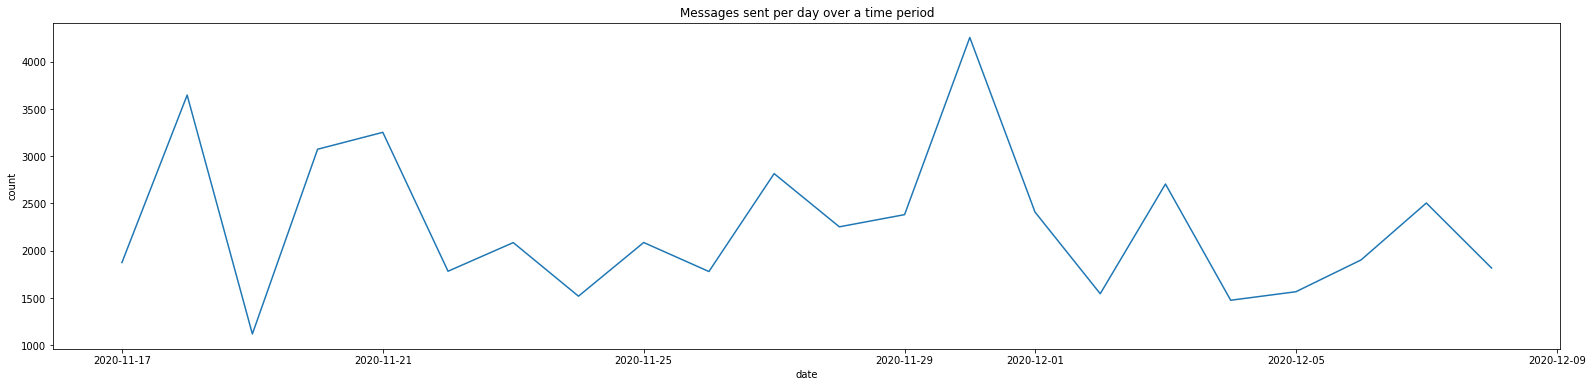

In [ ]:
grouped_by_date = df.groupby('date').sum().reset_index()

plt.figure(figsize = (27, 6))
sns.lineplot(x = 'date', y = 'count', data = grouped_by_date)
plt.title('Messages sent per day over a time period')

In [ ]:
def get_colors_of_certain_order(names_in_certain_order):
  order = list(names_in_certain_order)
  return_list = []
  for name in order:
    return_list.append(color_dict[name])
  return return_list
  print(return_list)

{'+1 (470) 284': '#577590',
 '+1 (615) 602': '#43AA8B',
 '+1 (615) 810': '#F8961E',
 '+233 20 052 6969': '#577590',
 '+233 20 152 2502': '#90BE6D',
 '+233 20 182 4503': '#F9C74F',
 '+233 20 203 7373': '#90BE6D',
 '+233 20 242 3067': '#F94144',
 '+233 20 298 9873': '#90BE6D',
 '+233 20 302 4948': '#577590',
 '+233 20 523 4042': '#F94144',
 '+233 20 542 8043': '#577590',
 '+233 20 674 4429': '#F9C74F',
 '+233 20 710 7634': '#43AA8B',
 '+233 20 854 1630': '#577590',
 '+233 20 915 2812': '#F9C74F',
 '+233 23 968 6217': '#F94144',
 '+233 24 120 5516': '#577590',
 '+233 24 128 8942': '#577590',
 '+233 24 196 4653': '#F8961E',
 '+233 24 408 0870': '#90BE6D',
 '+233 24 422 0425': '#F8961E',
 '+233 24 479 6032': '#43AA8B',
 '+233 24 567 6259': '#90BE6D',
 '+233 24 640 1492': '#6D597A',
 '+233 24 743 8422': '#F94144',
 '+233 24 829 1780': '#6D597A',
 '+233 24 936 6341': '#F8961E',
 '+233 26 381 9011': '#6D597A',
 '+233 26 421 6357': '#F8961E',
 '+233 26 740 7269': '#F94144',
 '+233 26 758 1764':

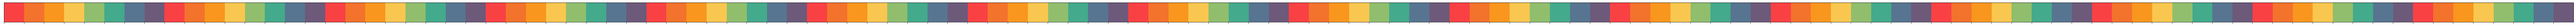

In [ ]:
color_dict = {}
colors = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A','#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A',
          '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A']
sns.palplot(colors)
names = df['name'].unique()

for name, color in zip(names, colors):
  color_dict[name] = color

color_dict

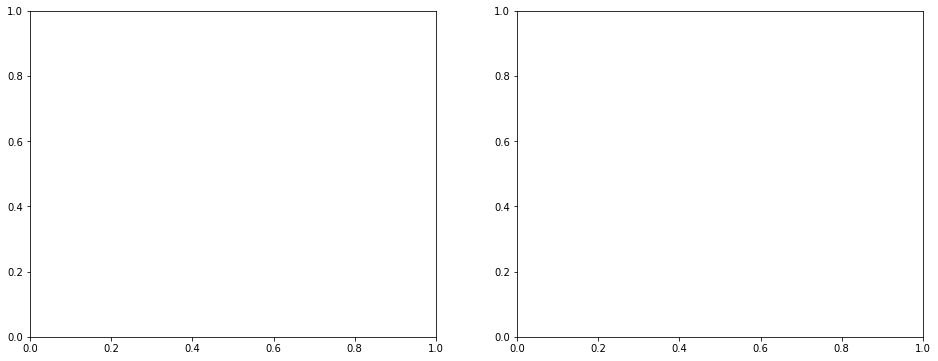

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (16, 6))

In [ ]:
sns.countplot(x = 'name', data = df, order = df['name'].value_counts().index, ax = axs[0], palette = get_colors_of_certain_order(df['name'].value_counts().index))

In [ ]:
axs[0].set_title('Total Messages Sent')

Text(0.5, 1.0, 'Total Messages Sent')

In [ ]:
df['msg_length'] = df['msg'].apply(lambda x: len(list(x)))
avg_msg_lengths = df.groupby('name').mean().reset_index().sort_values(by = 'msg_length', ascending = False)
sns.barplot(x = 'name', y = 'msg_length', data = avg_msg_lengths, ax = axs[1], palette = get_colors_of_certain_order(avg_msg_lengths['name']))
axs[1].set_title('Average Message Lengths')

Text(0.5, 1.0, 'Average Message Lengths')

In [ ]:
df[df['name'] == 'RF'].sort_values(by = 'msg_length', ascending = False).head(4)

,datetime,name,msg,date,day_sent,month_sent,year_sent,count,msg_length


Text(0.5, 1.0, 'Total Media Sent')

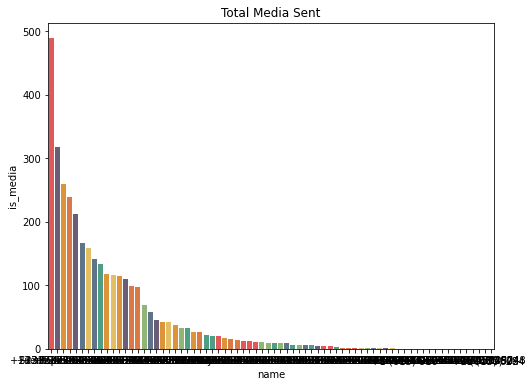

In [ ]:
plt.figure(figsize = (8, 6))
df['is_media'] = df['msg'].apply(lambda x: 1 if '<Media omitted>' in x else 0)
df.groupby('name').sum().reset_index().sort_values(by = 'is_media', ascending = False)[['name', 'is_media']]
total_media_count = df.groupby('name').sum().reset_index().sort_values(by = 'is_media', ascending = False)[['name', 'is_media']]
sns.barplot(x = 'name', y = 'is_media', data = total_media_count, palette = get_colors_of_certain_order(total_media_count['name']))
plt.title('Total Media Sent')

In [ ]:
word_dict = dict.fromkeys(df['name'].unique())
for key in word_dict.keys():
  word_dict[key] = {}

In [ ]:
for name, msg in zip(df['name'], df['msg']):
  for word in str(msg).split():
    # If word contains the 'media ommited' message ignore
    if word not in ['<Media', 'omitted>']: 
      if word in word_dict[name]:
        word_dict[name][word] += 1
      else:
        word_dict[name][word] = 1

In [ ]:
for name in df['name'].unique():
  word_dict[name] = {k: v for k, v in sorted(word_dict[name].items(), key = lambda item: item[1], reverse = True)}

In [ ]:
grouped_df = df.groupby('name').sum().reset_index()
grouped_df['most_used_words'] = grouped_df['name'].apply(lambda x: word_dict[x])
grouped_df[['name', 'most_used_words']]

,name,most_used_words
0,+1 (470) 284,"{'<generator': 142, 'object': 142, '<genexpr>'..."
1,+1 (615) 602,"{'<generator': 284, 'object': 284, '<genexpr>'..."
2,+1 (615) 810,"{'<generator': 49, 'object': 49, '<genexpr>': ..."
3,+233 20 052 6969,"{'at': 887, '<generator': 883, 'object': 883, ..."
4,+233 20 152 2502,"{'<generator': 10, 'object': 10, '<genexpr>': ..."
...,...,...
67,+44 7756 390937,"{'at': 381, '<generator': 379, 'object': 379, ..."
68,PopeOfDeath+,"{'at': 1334, '<generator': 1293, 'object': 129..."
69,Pyro,"{'at': 134, '<generator': 133, 'object': 133, ..."
70,SilentGhost+,"{'at': 3360, '<generator': 3342, 'object': 334..."


Text(0.5, 1.0, 'Total messages sent grouped by month')

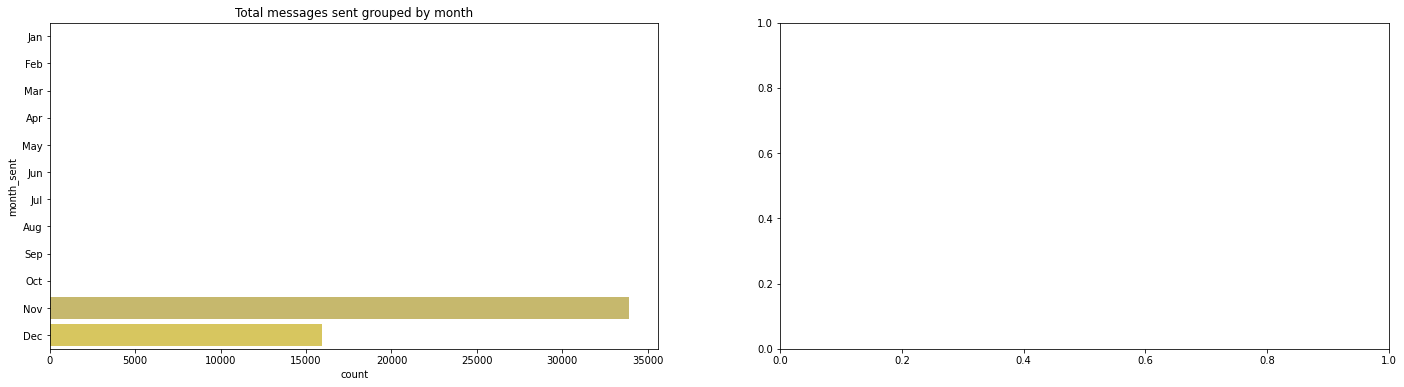

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (24, 6))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grouped_by_month = df.groupby('month_sent').sum().reset_index().sort_values(by = 'count', ascending = False)
sns.barplot(x = 'count', y = 'month_sent', data = grouped_by_month, order = months, ax = axs[0], palette = sns.color_palette('cividis', 12))
axs[0].set_title('Total messages sent grouped by month')

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
grouped_by_month_and_day = df.groupby(['month_sent', 'day_sent']).sum().reset_index()[['month_sent', 'day_sent', 'count']]
pt = grouped_by_month_and_day.pivot_table(index = 'month_sent', columns = 'day_sent', values = 'count').reindex(index = months, columns = days)
sns.heatmap(pt, cmap = 'cividis', ax = axs[1])
axs[1].set_title('Heatmap of month sent and day sent')

Text(0.5, 1.0, 'Heatmap of month sent and day sent')

Text(0.5, 1.0, 'Total messages sent grouped by day')

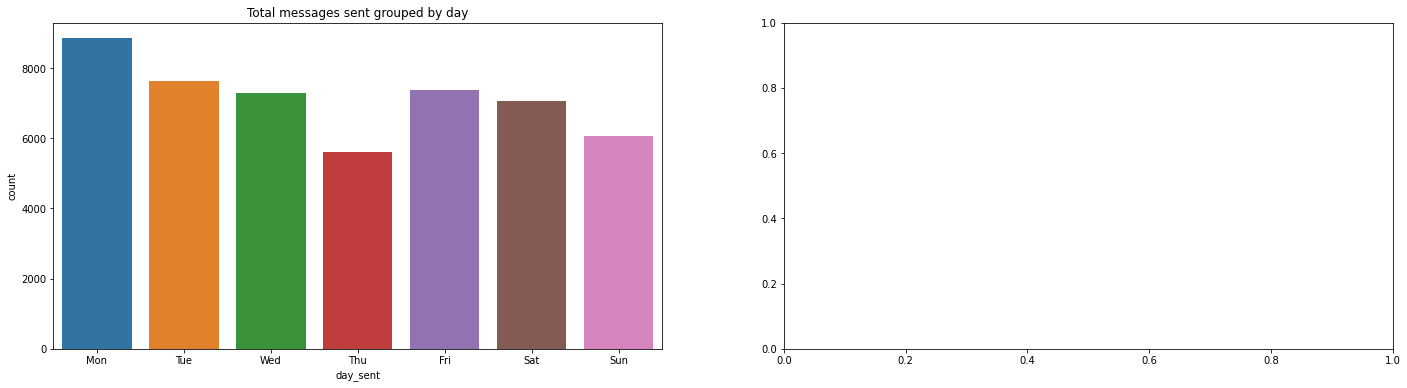

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (24, 6))

grouped_by_day = df.groupby('day_sent').sum().reset_index()[['day_sent', 'count']]
sns.barplot(y = 'count', x = 'day_sent', data = grouped_by_day, order = days, ax = axs[0])
axs[0].set_title('Total messages sent grouped by day')

In [ ]:
df['hour_sent'] = df['datetime'].apply(lambda x: x.hour)
grouped_by_time = df.groupby('hour_sent').sum().reset_index().sort_values(by = 'count', ascending = False)
sns.barplot(y = 'count', x = 'hour_sent', data = grouped_by_time, ax = axs[1])
axs[1].set_title('Most Active Hours')

Text(0.5, 1.0, 'Most Active Hours')

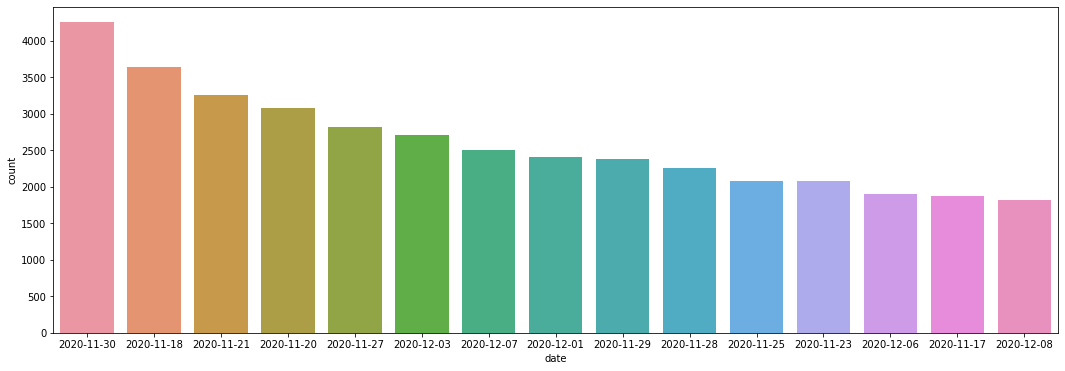

In [ ]:
plt.figure(figsize = (18, 6))
grouped_by_date = df.groupby('date').sum().reset_index().sort_values(by = 'count', ascending = False).head(15)
grouped_by_date['day_sent'] = grouped_by_date['date'].apply(lambda x: x.strftime('%a'))
ax = sns.barplot(y = 'count', x = 'date', data = grouped_by_date)

In [ ]:
for bar, label in zip(ax.patches, grouped_by_date['day_sent']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height + 10, label, ha="center") 


Text(0.5, 1.0, 'Most Active Days')

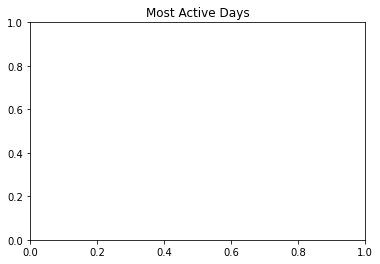

In [ ]:
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most Active Days')

In [ ]:
df['emojis'] = df['msg'].apply(lambda x: ''.join(c for c in x if c in emoji.UNICODE_EMOJI))
emoji_df = df[df['emojis'].apply(lambda x: True if x else False)]

In [ ]:
emoji_dict = dict.fromkeys(df['name'].unique())
for key in emoji_dict.keys():
  emoji_dict[key] = {}
  for emoji_key in emoji.UNICODE_EMOJI.keys():
    emoji_dict[key][emoji_key] = 0

In [ ]:
for name, emojis in zip(emoji_df['name'], emoji_df['emojis']):
  for single_emoji in emojis:
    emoji_dict[name][single_emoji] += 1

In [ ]:
for name in df['name'].unique():
  emoji_dict[name] = {k: v for k, v in sorted(emoji_dict[name].items(), key = lambda item: item[1], reverse = True)}

,name,most_used_emojis
70,SilentGhost+,"{'😂': 1910, '🏽': 92, '🤝': 74, '🔥': 30, '🙂': 19}"
56,+233 55 521 4548,"{'😂': 1324, '🔥': 52, '🌝': 28, '🤝': 24, '😑': 19}"
59,+233 55 728 4617,"{'😹': 806, '🔥': 145, '😭': 102, '💔': 23, '😡': 21}"
28,+233 26 381 9011,"{'😂': 906, '🔥': 55, '💀': 31, '🙂': 22, '😭': 21}"
19,+233 24 196 4653,"{'😹': 620, '😂': 208, '😊': 18, '👀': 17, '☹': 13}"
...,...,...
66,+44 7411 440030,"{'🥇': 0, '🥈': 0, '🥉': 0, '🆎': 0, '🏧': 0}"
12,+233 20 674 4429,"{'🥇': 0, '🥈': 0, '🥉': 0, '🆎': 0, '🏧': 0}"
4,+233 20 152 2502,"{'🥇': 0, '🥈': 0, '🥉': 0, '🆎': 0, '🏧': 0}"
2,+1 (615) 810,"{'🥇': 0, '🥈': 0, '🥉': 0, '🆎': 0, '🏧': 0}"


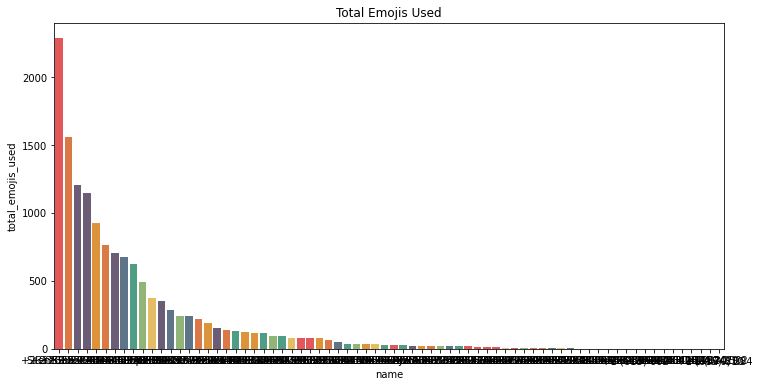

In [ ]:
grouped_df['most_used_emojis'] = grouped_df['name'].apply(lambda x: dict(itertools.islice(emoji_dict[x].items(), 5)))
grouped_df['total_emojis_used'] = grouped_df['name'].apply(lambda x: sum(emoji_dict[x].values()))
grouped_df = grouped_df.sort_values(by = 'total_emojis_used', ascending = False)
plt.figure(figsize = (12, 6))
sns.barplot(x = 'name', y = 'total_emojis_used', data = grouped_df, palette = get_colors_of_certain_order(grouped_df['name']))
plt.title('Total Emojis Used')
grouped_df[['name', 'most_used_emojis']]


In [ ]:
df[df['name'] == 'RF'].sort_values(by = 'msg_length', ascending = False).iloc[:4]

,datetime,name,msg,date,day_sent,month_sent,year_sent,count,msg_length,is_media,hour_sent,emojis


In [ ]:
df['swear'] = df['msg'].apply(lambda x: sum(predict([str(x)])))
df.head()

,datetime,name,msg,date,day_sent,month_sent,year_sent,count,msg_length,is_media,hour_sent,emojis,swear
0,2020-11-17 10:16:00,SilentGhost+,<generator object <genexpr> at 0x7ff04f2d13b8>,2020-11-17,Tue,Nov,2020,1,0,0,10,,0
19538,2020-11-17 10:16:00,+233 55 521 4548,Ayeduase access bank,2020-11-17,Tue,Nov,2020,1,21,0,10,,0
19539,2020-11-17 10:16:00,+233 55 521 4548,Ano know o😂😂,2020-11-17,Tue,Nov,2020,1,13,0,10,😂😂,0
19540,2020-11-17 10:16:00,+233 24 196 4653,But the thing be say cant they be jumping int...,2020-11-17,Tue,Nov,2020,1,84,0,10,,0
19537,2020-11-17 10:16:00,SilentGhost+,Ayeduase dey where?,2020-11-17,Tue,Nov,2020,1,20,0,10,,0


Text(0.5, 1.0, 'Percentage of texts that contain swear words')

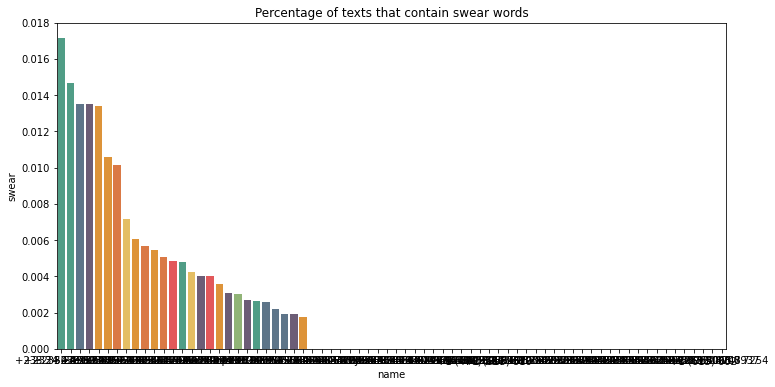

In [ ]:
plt.figure(figsize = (12, 6))
avg_swear_scores = df.groupby('name').mean().sort_values(by = 'swear', ascending = False)['swear'].reset_index()
sns.barplot(x = 'name', y = 'swear', data = avg_swear_scores, palette = get_colors_of_certain_order(avg_swear_scores['name']))
plt.title('Percentage of texts that contain swear words')

Text(0.5, 1.0, 'Total messages sent grouped by day')

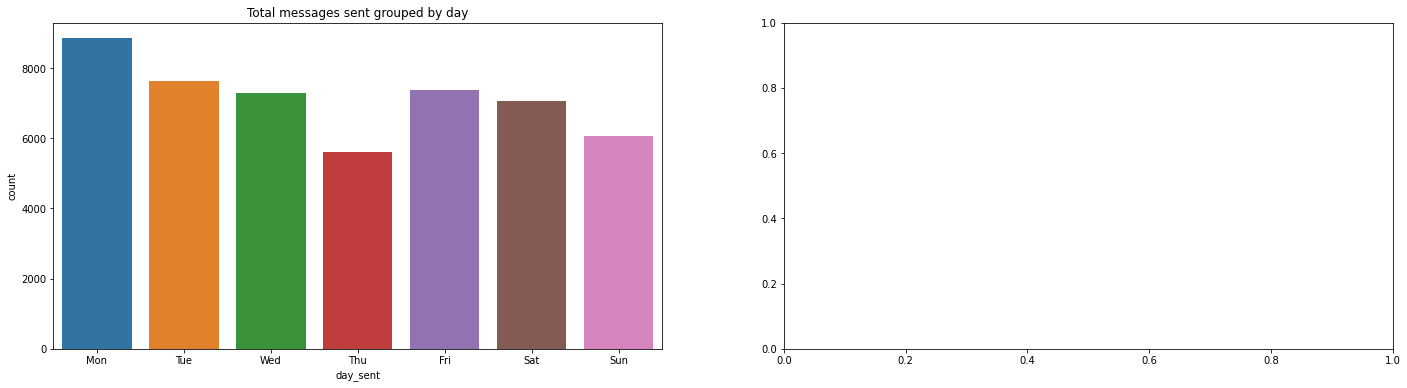

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (24, 6))
grouped_by_day = df.groupby('day_sent').sum().reset_index()[['day_sent', 'count']]
sns.barplot(y = 'count', x = 'day_sent', data = grouped_by_day, order = days, ax = axs[0])
axs[0].set_title('Total messages sent grouped by day')

In [ ]:
df['hour_sent'] = df['datetime'].apply(lambda x: x.hour)
grouped_by_time = df.groupby('hour_sent').sum().reset_index().sort_values(by = 'count', ascending = False)
sns.barplot(y = 'count', x = 'hour_sent', data = grouped_by_time, ax = axs[1])
axs[1].set_title('Most Active Hours')

Text(0.5, 1.0, 'Most Active Hours')

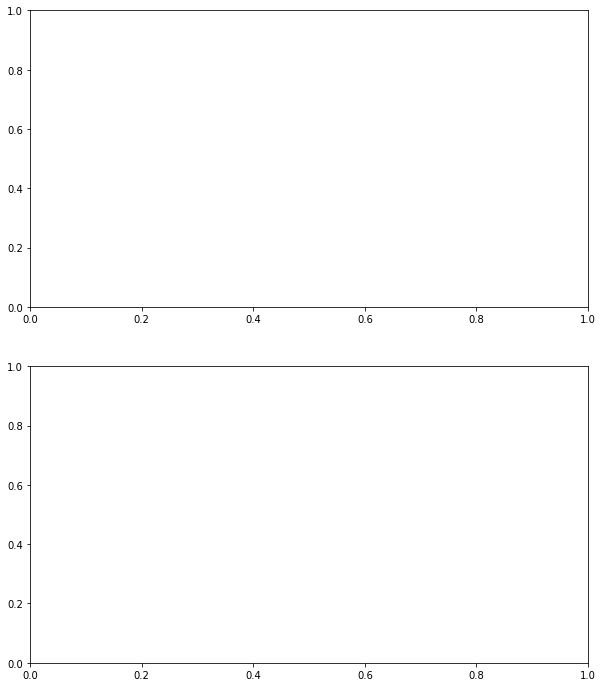

In [ ]:
fig, axs = plt.subplots(nrows = 2, figsize = (10, 12))
sid = SentimentIntensityAnalyzer()

In [ ]:
df['sentiment_vader'] = df['msg'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
grouped_by_name = df.groupby('name').mean().reset_index().sort_values(by = 'sentiment_vader', ascending = False)
sns.barplot(x = 'name', y = 'sentiment_vader', data = grouped_by_name, palette = get_colors_of_certain_order(grouped_by_name['name']), ax = axs[0])
axs[0].set_title('Average VADER sentiment score')

Text(0.5, 1.0, 'Average VADER sentiment score')

In [ ]:
df['sentiment_textblob'] = df['msg'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
grouped_by_name = df.groupby('name').mean().reset_index().sort_values(by = 'sentiment_textblob', ascending = False)
sns.barplot(x = 'name', y = 'sentiment_textblob', data = grouped_by_name, palette = get_colors_of_certain_order(grouped_by_name['name']), ax = axs[1])
axs[1].set_title('Average TextBlob sentiment score')

Text(0.5, 1.0, 'Average TextBlob sentiment score')

In [ ]:
df.sort_values(by = 'sentiment_textblob', ascending = False)[['name', 'msg', 'sentiment_vader', 'sentiment_textblob']].head(20)

,name,msg,sentiment_vader,sentiment_textblob
29346,+233 55 521 4548,Naa o I dey want legendary,0.0772,1.0
28968,+233 55 521 4548,Wey legendary gun you get?,-0.3400,1.0
42383,+233 26 381 9011,Best swimmer,0.6369,1.0
45255,+233 55 630 9247,Best price,0.6369,1.0
47482,+233 27 679 6992,Perfect video,0.5719,1.0
49027,+233 57 615 9749,Sicov legendary be 6500,0.0000,1.0
39131,+233 26 381 9011,Cook something delicious er,0.5719,1.0
35095,PopeOfDeath+,Chale me deE idk. All i know is best MP. So n...,0.5859,1.0
49011,SilentGhost+,Lawyers den lies deɛ best friends o,0.6705,1.0
24815,+233 55 521 4548,One of the best what?🤔,0.6369,1.0
